In [1]:
from tensorflow.keras.datasets import imdb
import numpy as np
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_seq(seqs, dim=10000):
    results = np.zeros((len(seqs), dim))
    for i, seq in enumerate(seqs):
        results[i, seq] = 1.
    return results

x_train = vectorize_seq(train_data)
x_test = vectorize_seq(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
model_1 = Sequential([Dense(16, activation='relu', input_shape=(10000, ), name='input'), Dense(16, activation='relu', name='hidden'), Dense(1, activation='sigmoid', name='output')])

In [4]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 16)                160016    
                                                                 
 hidden (Dense)              (None, 16)                272       
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [5]:
model_2 = Sequential([Dense(7, activation='relu', input_shape=(10000, ), name='input2'), Dense(7, activation='relu', name='hidden2'), Dense(1, activation='sigmoid', name='output2')])

In [6]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input2 (Dense)              (None, 7)                 70007     
                                                                 
 hidden2 (Dense)             (None, 7)                 56        
                                                                 
 output2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 70,071
Trainable params: 70,071
Non-trainable params: 0
_________________________________________________________________


In [7]:
model_1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model_2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [8]:
model_1_hist = model_1.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 48ms/step - loss: 0.4686 - acc: 0.8227 - val_loss: 0.3467 - val_acc: 0.8809
Epoch 2/20
49/49 [==============================] - 1s 21ms/step - loss: 0.2685 - acc: 0.9072 - val_loss: 0.2850 - val_acc: 0.8914
Epoch 3/20
49/49 [==============================] - 1s 21ms/step - loss: 0.2057 - acc: 0.9265 - val_loss: 0.2862 - val_acc: 0.8848
Epoch 4/20
49/49 [==============================] - 1s 21ms/step - loss: 0.1709 - acc: 0.9395 - val_loss: 0.2999 - val_acc: 0.8800
Epoch 5/20
49/49 [==============================] - 1s 21ms/step - loss: 0.1466 - acc: 0.9486 - val_loss: 0.3074 - val_acc: 0.8816
Epoch 6/20
49/49 [==============================] - 1s 22ms/step - loss: 0.1284 - acc: 0.9559 - val_loss: 0.3269 - val_acc: 0.8775
Epoch 7/20
49/49 [==============================] - 1s 21ms/step - loss: 0.1135 - acc: 0.9619 - val_loss: 0.3605 - val_acc: 0.8698
Epoch 8/20
49/49 [==============================] - 1s 21ms/step - loss: 0.0996 - a

In [9]:
model_2_hist = model_2.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 42ms/step - loss: 0.4884 - acc: 0.8211 - val_loss: 0.3780 - val_acc: 0.8754
Epoch 2/20
49/49 [==============================] - 1s 20ms/step - loss: 0.2979 - acc: 0.9040 - val_loss: 0.3114 - val_acc: 0.8825
Epoch 3/20
49/49 [==============================] - 1s 21ms/step - loss: 0.2290 - acc: 0.9240 - val_loss: 0.2829 - val_acc: 0.8901
Epoch 4/20
49/49 [==============================] - 1s 21ms/step - loss: 0.1923 - acc: 0.9345 - val_loss: 0.2917 - val_acc: 0.8819
Epoch 5/20
49/49 [==============================] - 1s 21ms/step - loss: 0.1677 - acc: 0.9441 - val_loss: 0.3166 - val_acc: 0.8728
Epoch 6/20
49/49 [==============================] - 1s 21ms/step - loss: 0.1488 - acc: 0.9491 - val_loss: 0.2964 - val_acc: 0.8822
Epoch 7/20
49/49 [==============================] - 1s 22ms/step - loss: 0.1331 - acc: 0.9572 - val_loss: 0.3081 - val_acc: 0.8798
Epoch 8/20
49/49 [==============================] - 1s 21ms/step - loss: 0.1202 - a

In [10]:
epochs = range(1, 21)
model_1_val_loss = model_1_hist.history['val_loss']
model_2_val_loss = model_2_hist.history['val_loss']

In [11]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

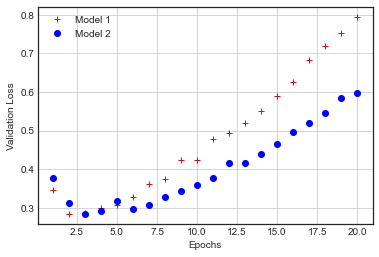

In [12]:
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, model_2_val_loss, 'bo', label='Model 2')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

In [13]:
model_3 = Sequential([Dense(1024, activation='relu', input_shape=(10000, ), name='input3'), Dense(1024, activation='relu', name='hidden3'), Dense(1, activation='sigmoid', name='output3')])

model_3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input3 (Dense)              (None, 1024)              10241024  
                                                                 
 hidden3 (Dense)             (None, 1024)              1049600   
                                                                 
 output3 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 11,291,649
Trainable params: 11,291,649
Non-trainable params: 0
_________________________________________________________________


In [14]:
model_3_hist = model_3.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 48ms/step - loss: 0.5282 - acc: 0.7832 - val_loss: 0.2981 - val_acc: 0.8781
Epoch 2/20
49/49 [==============================] - 1s 26ms/step - loss: 0.2207 - acc: 0.9148 - val_loss: 0.5230 - val_acc: 0.8013
Epoch 3/20
49/49 [==============================] - 1s 26ms/step - loss: 0.1115 - acc: 0.9583 - val_loss: 0.3484 - val_acc: 0.8820
Epoch 4/20
49/49 [==============================] - 1s 26ms/step - loss: 0.0505 - acc: 0.9844 - val_loss: 0.4823 - val_acc: 0.8768
Epoch 5/20
49/49 [==============================] - 1s 26ms/step - loss: 0.1424 - acc: 0.9858 - val_loss: 0.4532 - val_acc: 0.8799
Epoch 6/20
49/49 [==============================] - 1s 26ms/step - loss: 9.3430e-04 - acc: 0.9999 - val_loss: 0.6579 - val_acc: 0.8806
Epoch 7/20
49/49 [==============================] - 1s 27ms/step - loss: 8.8706e-05 - acc: 1.0000 - val_loss: 1.1250 - val_acc: 0.8506
Epoch 8/20
49/49 [==============================] - 1s 26ms/step - loss: 0.

In [15]:
model_3_val_loss = model_3_hist.history['val_loss']

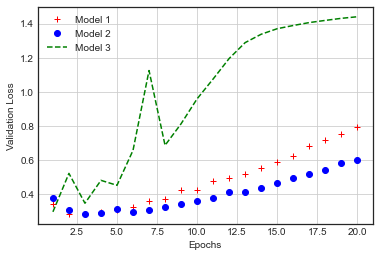

In [16]:
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, model_2_val_loss, 'bo', label='Model 2')
plt.plot(epochs, model_3_val_loss, 'g--', label='Model 3')

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

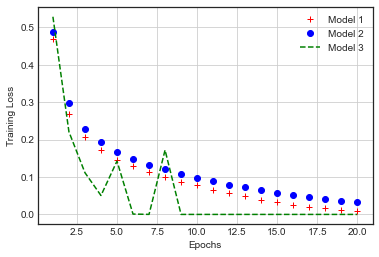

In [17]:
model_1_train_loss = model_1_hist.history['loss']
model_2_train_loss = model_2_hist.history['loss']
model_3_train_loss = model_3_hist.history['loss']

plt.plot(epochs, model_1_train_loss, 'r+', label='Model 1')
plt.plot(epochs, model_2_train_loss, 'bo', label='Model 2')
plt.plot(epochs, model_3_train_loss, 'g--', label='Model 3')

plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend()
plt.grid()

plt.show()

In [18]:
from tensorflow.keras.layers import Dense, LeakyReLU, Activation
from tensorflow.keras.models import Sequential


In [19]:
model = Sequential([Dense(30, kernel_initializer='he_normal', input_shape=[10,10]), LeakyReLU(alpha=0.2), Dense(1, kernel_initializer='he_normal'), Activation('softmax')])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10, 30)            330       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 10, 30)            0         
                                                                 
 dense_1 (Dense)             (None, 10, 1)             31        
                                                                 
 activation (Activation)     (None, 10, 1)             0         
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


In [20]:
import tensorflow as tf
from tensorflow.keras.optimizers import SGD, Adam


In [21]:
optimizer = SGD(learning_rate=0.001, momentum=0.9)

In [22]:
optimizer = SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

In [23]:
from tensorflow.keras.optimizers import Adagrad

In [24]:
optimizer = Adagrad(learning_rate=0.01)

In [25]:
from tensorflow.keras.optimizers import RMSprop

In [26]:
optimizer = RMSprop(learning_rate=0.001, rho=0.9)

In [27]:
from tensorflow.keras.optimizers import Adam

In [28]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [30]:
from tensorflow.keras.layers import BatchNormalization, Dense, Activation
from tensorflow.keras.utils import plot_model

In [32]:
model = Sequential()

model.add(Dense(32, input_shape=(28*28, ), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.summary()

plot_model(model, show_shapes=True)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                25120     
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 32)                0         
                                                                 
Total params: 25,248
Trainable params: 25,184
Non-trainable params: 64
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [33]:
from tensorflow.keras.regularizers import l1, l2, l1_l2

In [36]:
l2_model = Sequential([Dense(16, kernel_regularizer=l2(0.001), activation='relu', input_shape=(10000, )), 
                       Dense(16, kernel_regularizer=l2(0.001), activation='relu'), 
                       Dense(1, activation='sigmoid')])

l2_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

l2_model.summary()
plot_model(l2_model, show_shapes=True)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                160016    
                                                                 
 dense_5 (Dense)             (None, 16)                272       
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [37]:
l2_model_hist = l2_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 46ms/step - loss: 0.4798 - acc: 0.8231 - val_loss: 0.3889 - val_acc: 0.8696
Epoch 2/20
49/49 [==============================] - 1s 22ms/step - loss: 0.3108 - acc: 0.9054 - val_loss: 0.3486 - val_acc: 0.8785
Epoch 3/20
49/49 [==============================] - 1s 21ms/step - loss: 0.2642 - acc: 0.9236 - val_loss: 0.3369 - val_acc: 0.8828
Epoch 4/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2455 - acc: 0.9289 - val_loss: 0.3740 - val_acc: 0.8674
Epoch 5/20
49/49 [==============================] - 1s 21ms/step - loss: 0.2309 - acc: 0.9349 - val_loss: 0.3412 - val_acc: 0.8842
Epoch 6/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2216 - acc: 0.9397 - val_loss: 0.3522 - val_acc: 0.8801
Epoch 7/20
49/49 [==============================] - 1s 21ms/step - loss: 0.2163 - acc: 0.9414 - val_loss: 0.3956 - val_acc: 0.8664
Epoch 8/20
49/49 [==============================] - 1s 23ms/step - loss: 0.2095 - a

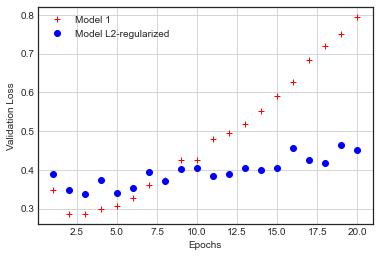

In [38]:
l2_model_val_loss = l2_model_hist.history['val_loss']

epochs = range(1, 21)
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, l2_model_val_loss, 'bo', label='Model L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

In [39]:
l1_model = Sequential([Dense(16, kernel_regularizer=l1(0.0001), activation='relu', input_shape=(10000, )), 
                       Dense(16, kernel_regularizer=l1(0.0001), activation='relu'), 
                       Dense(1, activation='sigmoid')])

l1_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

l1_model.summary()
plot_model(l2_model, show_shapes=True)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 16)                160016    
                                                                 
 dense_8 (Dense)             (None, 16)                272       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [40]:
l1_model_hist = l1_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 44ms/step - loss: 0.5637 - acc: 0.8212 - val_loss: 0.4344 - val_acc: 0.8788
Epoch 2/20
49/49 [==============================] - 1s 22ms/step - loss: 0.3842 - acc: 0.8914 - val_loss: 0.3817 - val_acc: 0.8858
Epoch 3/20
49/49 [==============================] - 1s 22ms/step - loss: 0.3460 - acc: 0.9021 - val_loss: 0.3644 - val_acc: 0.8878
Epoch 4/20
49/49 [==============================] - 1s 21ms/step - loss: 0.3271 - acc: 0.9067 - val_loss: 0.3612 - val_acc: 0.8878
Epoch 5/20
49/49 [==============================] - 1s 21ms/step - loss: 0.3184 - acc: 0.9101 - val_loss: 0.3652 - val_acc: 0.8859
Epoch 6/20
49/49 [==============================] - 1s 24ms/step - loss: 0.3097 - acc: 0.9140 - val_loss: 0.3669 - val_acc: 0.8838
Epoch 7/20
49/49 [==============================] - 1s 20ms/step - loss: 0.3059 - acc: 0.9154 - val_loss: 0.3873 - val_acc: 0.8758
Epoch 8/20
49/49 [==============================] - 1s 20ms/step - loss: 0.2962 - a

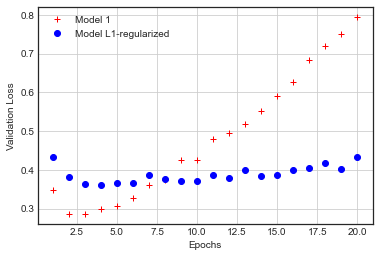

In [41]:
l1_model_val_loss = l1_model_hist.history['val_loss']

epochs = range(1, 21)
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, l1_model_val_loss, 'bo', label='Model L1-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

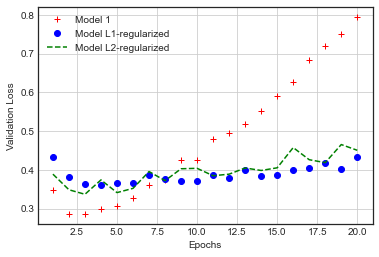

In [43]:
epochs = range(1, 21)
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, l1_model_val_loss, 'bo', label='Model L1-regularized')
plt.plot(epochs, l2_model_val_loss, 'g--', label='Model L2-regularized')

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

In [44]:
l1_l2_model = Sequential([Dense(16, kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001), activation='relu', input_shape=(10000, )), 
                       Dense(16, kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001), activation='relu'), 
                       Dense(1, activation='sigmoid')])

l1_l2_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

l1_l2_model.summary()
plot_model(l1_l2_model, show_shapes=True)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 16)                160016    
                                                                 
 dense_14 (Dense)            (None, 16)                272       
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [45]:
l1_l2_model_hist = l1_l2_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 46ms/step - loss: 0.5658 - acc: 0.8130 - val_loss: 0.4294 - val_acc: 0.8803
Epoch 2/20
49/49 [==============================] - 1s 20ms/step - loss: 0.3785 - acc: 0.8937 - val_loss: 0.3726 - val_acc: 0.8879
Epoch 3/20
49/49 [==============================] - 1s 21ms/step - loss: 0.3350 - acc: 0.9060 - val_loss: 0.3847 - val_acc: 0.8749
Epoch 4/20
49/49 [==============================] - 1s 22ms/step - loss: 0.3187 - acc: 0.9102 - val_loss: 0.3635 - val_acc: 0.8870
Epoch 5/20
49/49 [==============================] - 1s 22ms/step - loss: 0.3073 - acc: 0.9128 - val_loss: 0.3819 - val_acc: 0.8766
Epoch 6/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2996 - acc: 0.9168 - val_loss: 0.3624 - val_acc: 0.8864
Epoch 7/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2925 - acc: 0.9206 - val_loss: 0.3826 - val_acc: 0.8771
Epoch 8/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2872 - a

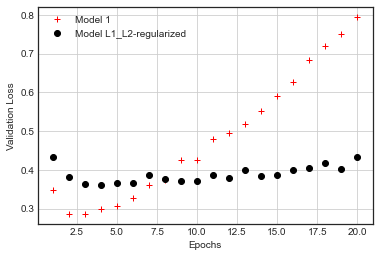

In [48]:
l1_l2_model_val_loss = l1_l2_model_hist.history['val_loss']

epochs = range(1, 21)
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, l1_model_val_loss, 'ko', label='Model L1_L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

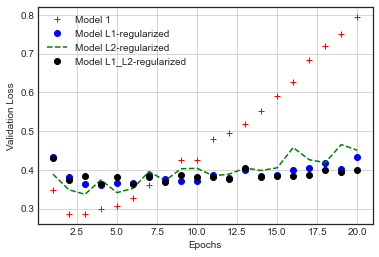

In [50]:
epochs = range(1, 21)
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, l1_model_val_loss, 'bo', label='Model L1-regularized')
plt.plot(epochs, l2_model_val_loss, 'g--', label='Model L2-regularized')
plt.plot(epochs, l1_l2_model_val_loss, 'ko', label='Model L1_L2-regularized')

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

In [51]:
from tensorflow.keras.layers import Dropout

In [52]:
dropout_model= Sequential([Dense(16, activation='relu', input_shape=(10000, )), 
                           Dropout(0.5),
                           Dense(16, activation='relu'), Dropout(0.5),
                           Dense(1, activation='sigmoid')])

dropout_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

dropout_model.summary()
plot_model(dropout_model, show_shapes=True)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 16)                160016    
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_17 (Dense)            (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_18 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) an

In [53]:
dopout_model_hist = dropout_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 49ms/step - loss: 0.6030 - acc: 0.6769 - val_loss: 0.4661 - val_acc: 0.8587
Epoch 2/20
49/49 [==============================] - 1s 22ms/step - loss: 0.4599 - acc: 0.8117 - val_loss: 0.3577 - val_acc: 0.8840
Epoch 3/20
49/49 [==============================] - 1s 21ms/step - loss: 0.3764 - acc: 0.8544 - val_loss: 0.3107 - val_acc: 0.8879
Epoch 4/20
49/49 [==============================] - 1s 21ms/step - loss: 0.3184 - acc: 0.8844 - val_loss: 0.2914 - val_acc: 0.8894
Epoch 5/20
49/49 [==============================] - 1s 23ms/step - loss: 0.2839 - acc: 0.9012 - val_loss: 0.2784 - val_acc: 0.8910
Epoch 6/20
49/49 [==============================] - 1s 23ms/step - loss: 0.2547 - acc: 0.9109 - val_loss: 0.2822 - val_acc: 0.8898
Epoch 7/20
49/49 [==============================] - 1s 28ms/step - loss: 0.2230 - acc: 0.9243 - val_loss: 0.3071 - val_acc: 0.8873
Epoch 8/20
49/49 [==============================] - 1s 24ms/step - loss: 0.2123 - a

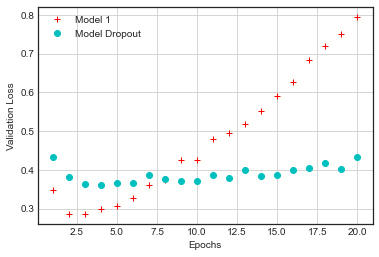

In [54]:
dropout_model_val_loss = dopout_model_hist.history['val_loss']

epochs = range(1, 21)
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, l1_model_val_loss, 'co', label='Model Dropout')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()